#Initial Test

##Data Import

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, plot_roc_curve, classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, log_loss
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('hotel_bookings.csv')

##Data Preprocessing

###Data Cleaning

In [3]:
# Preview dataframe
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [4]:
# View dataframe dimensions
df.shape

(119390, 32)

In [5]:
# View data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Find the columns with NULLs
is_null = df.isnull().sum().sort_values(ascending = False)
is_null[is_null!=0]

company     112593
agent        16340
country        488
children         4
dtype: int64

In [7]:
# Replace NULLs
replace_NULLs = {'children': 0, 'country':'Not Applicable', 'agent': 0, 'company': 0}
df = df.fillna(replace_NULLs)

In [8]:
# Check that there are no NULLs
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

###Label Encoding

In [9]:
# Transform the data because some columns contain categorical values
transform = LabelEncoder()
df['hotel'] = transform.fit_transform(df['hotel'])
df['arrival_date_month'] = transform.fit_transform(df['arrival_date_month'])
df['meal'] = transform.fit_transform(df['meal'])
df['country'] = transform.fit_transform(df['country'])
df['agent'] = transform.fit_transform(df['agent'])
df['company'] = transform.fit_transform(df['company'])
df['market_segment'] = transform.fit_transform(df['market_segment'])
df['distribution_channel'] = transform.fit_transform(df['distribution_channel'])
df["reserved_room_type"] = transform.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = transform.fit_transform(df['assigned_room_type'])
df['deposit_type'] = transform.fit_transform(df['deposit_type'])
df['customer_type'] = transform.fit_transform(df['customer_type'])
df['reservation_status'] = transform.fit_transform(df['reservation_status'])
df['reservation_status_date'] = transform.fit_transform(df['reservation_status_date'])

##Split Data to Training and Test Sets

In [10]:
# Target: is_canceled
X = df.drop(['is_canceled'], axis=1)
y = df['is_canceled']

In [11]:
# Split data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

###Standardize

In [12]:
# Standardize
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

##Machine Learning Tasks

###Logistic Regression

In [13]:
# Logistic Regression
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LR_prob = LR_model.predict_proba(X_test)[:, 1]
LR_pred = LR_model.predict(X_test)

print('Probability Esimates')
print(LR_prob)
print('\nPredicted Class Labels')
print(LR_pred)

print('\nMatrix')
print(confusion_matrix(y_test, LR_pred))

print('\nClassification Report')
print(classification_report(y_test, LR_pred))

print(f'\nAccuracy: {accuracy_score(y_test, LR_pred)}')

print(f'\nLog loss: {log_loss(y_test, LR_prob)}')

print(f'\nAUC: {roc_auc_score(y_test, LR_pred)}')
print(f'Recall score: {recall_score(y_test, LR_pred)}')
print(f'Precision score: {recall_score(y_test, LR_pred)}')
print(f'f1-score: {f1_score(y_test, LR_pred)}')

Probability Esimates
[0.11252025 0.96276571 0.05482654 ... 0.9959743  0.96688031 0.04810181]

Predicted Class Labels
[0 1 0 ... 1 1 0]

Matrix
[[22571     7]
 [  338 12901]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22578
           1       1.00      0.97      0.99     13239

    accuracy                           0.99     35817
   macro avg       0.99      0.99      0.99     35817
weighted avg       0.99      0.99      0.99     35817


Accuracy: 0.9903677024876455

Log loss: 0.11798636971428589

AUC: 0.9870796672399292
Recall score: 0.9744693707983987
Precision score: 0.9744693707983987
f1-score: 0.9868053696408766


####with Cross Validation

In [14]:
# default cv is Stratified K-Folds (=10)

LRCV_model = LogisticRegressionCV()
LRCV_model.fit(X_train,y_train)

LRCV_prob = LRCV_model.predict_proba(X_test)[:, 1]
LRCV_pred = LRCV_model.predict(X_test)

print('Probability Estimates')
print(LRCV_prob)
print('\nPredicted Class Labels')
print(LRCV_pred)

print('\nMatrix')
print(confusion_matrix(y_test, LRCV_pred))

print('\nClassification Report')
print(classification_report(y_test, LRCV_pred))

print(f'\nAccuracy: {accuracy_score(y_test, LRCV_pred)}')
LRCV_acc = accuracy_score(y_test, LRCV_pred)

print(f'\nLog loss: {log_loss(y_test, LRCV_prob)}')

print(f'\nAUC: {roc_auc_score(y_test, LRCV_pred)}')
print(f'Recall score: {recall_score(y_test, LRCV_pred)}')
print(f'Precision score: {recall_score(y_test, LRCV_pred)}')
print(f'f1-score: {f1_score(y_test, LRCV_pred)}')

Probability Estimates
[0.13976114 0.89361662 0.09427554 ... 0.97964611 0.90514954 0.08050262]

Predicted Class Labels
[0 1 0 ... 1 1 0]

Matrix
[[22578     0]
 [  338 12901]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22578
           1       1.00      0.97      0.99     13239

    accuracy                           0.99     35817
   macro avg       0.99      0.99      0.99     35817
weighted avg       0.99      0.99      0.99     35817


Accuracy: 0.990563140408186

Log loss: 0.1345966050146588

AUC: 0.9872346853991993
Recall score: 0.9744693707983987
Precision score: 0.9744693707983987
f1-score: 0.9870696250956389


###XGBoost with K-Fold Cross Validation 

In [15]:
# dataset currently
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,0,0,0,0,2,0.00,0,0,1,668
1,1,0,737,2015,5,27,1,0,0,2,...,0,0,0,0,2,0.00,0,0,1,668
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,0,0,2,75.00,0,0,1,701
3,1,0,13,2015,5,27,1,0,1,1,...,0,221,0,0,2,75.00,0,0,1,701
4,1,0,14,2015,5,27,1,0,2,2,...,0,174,0,0,2,98.00,0,1,1,734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,...,0,272,0,0,2,96.14,0,0,1,916
119386,0,0,102,2017,1,35,31,2,5,3,...,0,9,0,0,2,225.43,0,2,1,919
119387,0,0,34,2017,1,35,31,2,5,2,...,0,9,0,0,2,157.71,0,4,1,919
119388,0,0,109,2017,1,35,31,2,5,2,...,0,78,0,0,2,104.40,0,0,1,919


In [16]:
print(df.keys())

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [17]:
#XGBoost

X = df.drop(['is_canceled'], axis=1)
y = df['is_canceled']

# now we'll create a data matrix from the existing dataset which XGBoost will require. 
dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
#data split 

# we're splitting the data so that Training is 70% of data and test data is 30% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [19]:
# here we're creating a XGBoost regressor and use this regressor to fit the training set to make the necessary 
# predications 

# hyperparameters used here:
# objective - States which loss function is being used : Linear, Logistic, Binary 
# colsample_bytree - Percentage of features used by each tree. Caution is that if this value is too high, it could lead to overfitting
# learning_rate - Step size shrinkage ranging from [0,1] used to prevent overfitting 
# max_depth  - How deeply each tree is allowed to grow during a boosting round 
# alpha - L1 regularization on leaf weights 
# n_estimators - Number of trees to build 

xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.5, learning_rate = 0.1,
                max_depth = 15,alpha = 10, n_estimators = 10)

model = xg_reg.fit(X_train,y_train)
model

XGBRegressor(alpha=10, colsample_bytree=0.5, max_depth=15, n_estimators=10,
             objective='binary:logistic')

In [20]:
# Now for the test set
#model = XGBClassifier(objective='binary:logistic')
model.fit(X_train, y_train)
#y_pred = xg_reg.predict(X_test)
#predictions = [round(value) for value in y_pred]

#preds = xg_reg.predict(X_test)
#preds
X_test
y_test

79204     0
73022     1
44658     0
19217     1
45223     1
         ..
89807     0
8494      1
58796     1
64050     1
108421    0
Name: is_canceled, Length: 35817, dtype: int64

In [21]:
preds  = model.predict(X_test)
preds
# However the out of preds is an array of probabilities. So we will convert them into labels 
#print(confusion_matrix(y_test, preds))
labels = np.array(preds)
labels = [int(p>= 0.5) for p in preds]
print(confusion_matrix(y_test, labels))

[[22578     0]
 [   16 13223]]


In [22]:
# evaluate predictions
accuracy = accuracy_score(y_test, labels)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#preds = xg_reg.predict(X_test)
#preds
#_train

Accuracy: 99.96%


In [23]:
# Now we'll calculate the root Mean Squared Error 
# to get an idea of how far the residuals are from the regression line.
# RMSE is a measure of how spread out these residuals are. In other words
# it will tell us how concentrated the data is around the line of best fit.

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.243420


In [24]:
# Adding K-Fold Cross Validation to make a more robust model 

# We'll create a dictionary of hyperparameters which holds all the hyper-parameters and their values as key-value pairs 
# We'll use this is create a 3 fold cross validation system 


    
cross_val_results = xgb.cv(dtrain=dmatrix, params={"objective":"binary:logistic",'colsample_bytree': 0.5,'learning_rate': 0.1,'max_depth': 15, 'alpha': 10}, 
                           nfold=3, num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)


cross_val_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.450436,4.714045e-07,0.450175,9.428090e-07
1,0.412902,9.886531e-03,0.412976,1.029194e-02
2,0.384540,1.563307e-02,0.384982,1.603171e-02
3,0.368210,1.879957e-02,0.368964,1.915505e-02
4,0.344235,1.330536e-02,0.345186,1.337879e-02


In [25]:
print((cross_val_results["test-rmse-mean"]).tail(1))

49    0.032579
Name: test-rmse-mean, dtype: float64


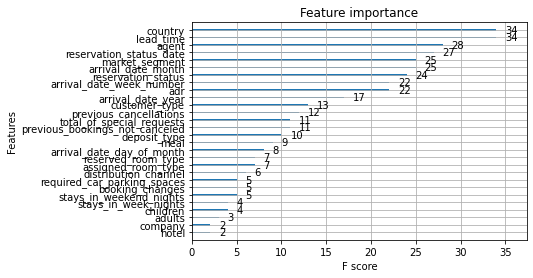

In [26]:
#Feature importance 

xg_reg = xgb.train(params={"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.5,'max_depth': 5, 'alpha': 10}, 
                   dtrain=dmatrix, num_boost_round=50)

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [27]:
print('\nMatrix')
print(confusion_matrix(y_test, labels))

print('\nClassification Report')
print(classification_report(y_test, labels))

print(f'\nAccuracy: {accuracy_score(y_test, labels)}')

print(f'\nAUC: {roc_auc_score(y_test, labels)}')
print(f'Recall score: {recall_score(y_test, labels)}')
print(f'Precision score: {recall_score(y_test, labels)}')
print(f'f1-score: {f1_score(y_test, labels)}')


Matrix
[[22578     0]
 [   16 13223]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22578
           1       1.00      1.00      1.00     13239

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817


Accuracy: 0.9995532847530503

AUC: 0.9993957247526248
Recall score: 0.9987914495052497
Precision score: 0.9987914495052497
f1-score: 0.9993953593832666


In [28]:
# evaluate predictions
accuracy = accuracy_score(y_test, labels)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#preds = xg_reg.predict(X_test)
#preds
#_train

Accuracy: 99.96%


###Decision Tree


In [29]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

In [30]:
acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)
acc_dtc
print("Decision Tree Accuracy: %.2f%%" % (acc_dtc * 100.0))

Decision Tree Accuracy: 100.00%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


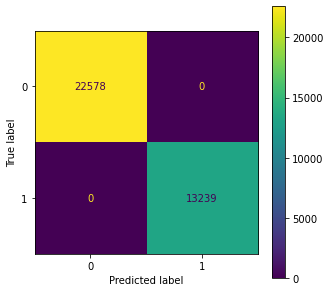

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc, X_test, y_test)

In [ ]:
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22578
           1       1.00      1.00      1.00     13239

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817



###Comparison of Accuracy Scores

In [31]:
i_acc_dtc = acc_dtc
i_acc_xgb = accuracy
i_acc_lrcv = LRCV_acc

table = pd.DataFrame({"Model": ["Decision Tree", "Logistic Regression CV", "XGBoost with K-folds CV"], "Accuracy Scores": [i_acc_dtc, i_acc_lrcv, i_acc_xgb]})
table["Model"] = table["Model"].astype("category")
table["Accuracy Scores"] = table["Accuracy Scores"].astype("float32")

pd.pivot_table(table, index = ["Model"]).sort_values(by = 'Accuracy Scores', ascending=False)

,Accuracy Scores
Model,
Decision Tree,1.000000
XGBoost with K-folds CV,0.999553
Logistic Regression CV,0.990563


#Final Test

##Drop reservation_status

In [ ]:
# View correlations
np.abs(df.corr()['is_canceled']).sort_values(ascending=False)

is_canceled                       1.000000
reservation_status                0.917196
deposit_type                      0.468634
lead_time                         0.293123
country                           0.268750
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
assigned_room_type                0.176028
distribution_channel              0.167600
booking_changes                   0.144381
reservation_status_date           0.143190
hotel                             0.136531
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.081265
customer_type                     0.068140
reserved_room_type                0.061282
adults                            0.060017
market_segment                    0.059338
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
agent                             0.046782
babies     

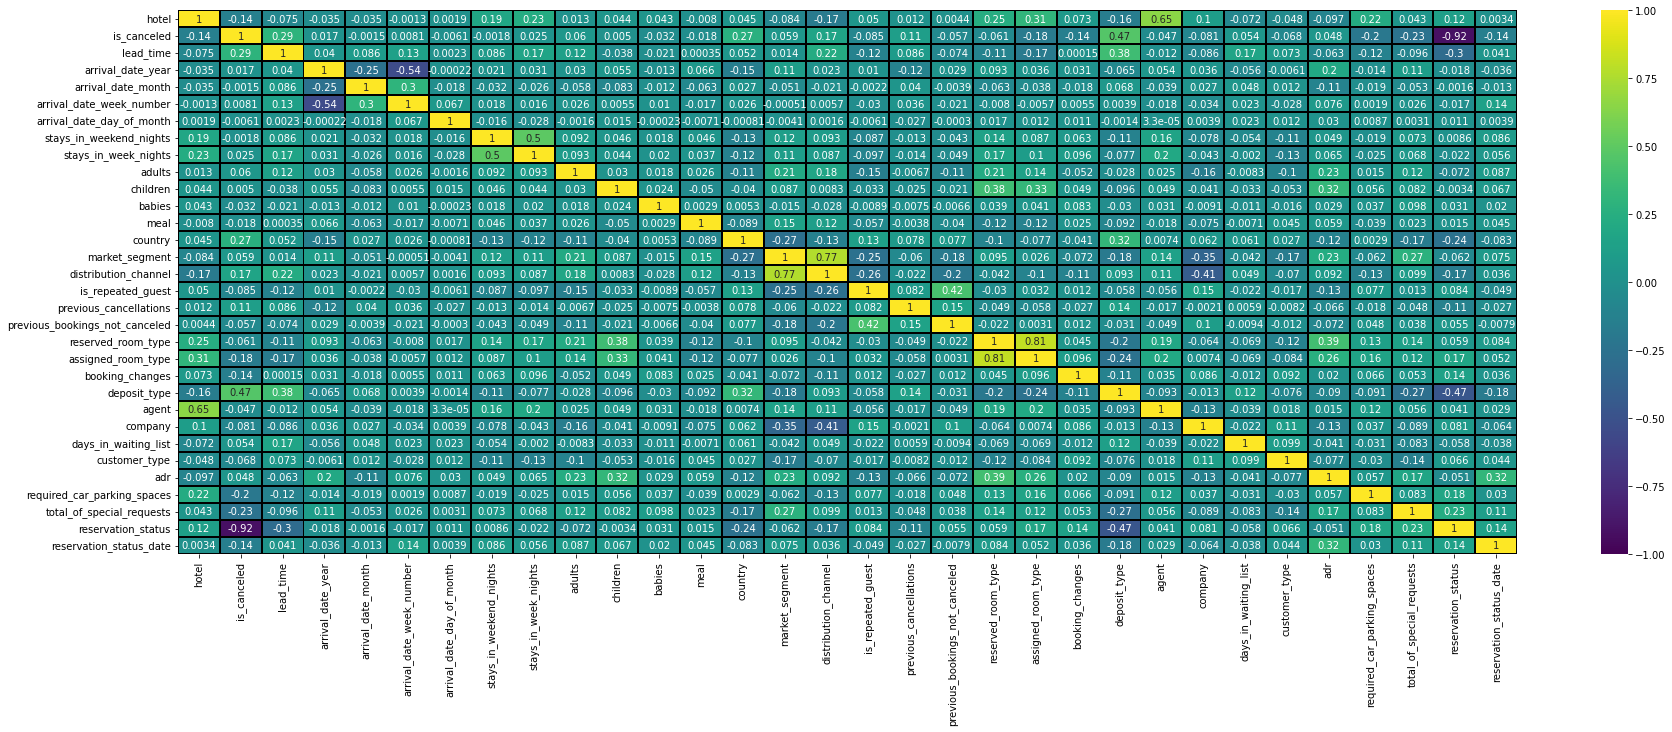

In [ ]:
# Plot correlations
fig,axes = plt.subplots(1,1,figsize=(30,10))
sns.heatmap(df.corr(), annot= True, vmin = -1, vmax = 1, linewidths = 1, cmap = 'viridis', linecolor='black')
plt.show()

In [ ]:
df = df.drop(['reservation_status'], axis = 1)

##Logistic Regression with CV

In [32]:
# Target: is_canceled
X = df.drop(['is_canceled'], axis=1)
y = df['is_canceled']

# Split data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

# Standardize
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [33]:
# default cv is Stratified K-Folds (=10)

LRCV_model = LogisticRegressionCV()
LRCV_model.fit(X_train,y_train)

LRCV_prob = LRCV_model.predict_proba(X_test)[:, 1]
LRCV_pred = LRCV_model.predict(X_test)

print('Probability Estimates')
print(LRCV_prob)
print('\nPredicted Class Labels')
print(LRCV_pred)

print('\nMatrix')
print(confusion_matrix(y_test, LRCV_pred))

print('\nClassification Report')
print(classification_report(y_test, LRCV_pred))

print(f'\nAccuracy: {accuracy_score(y_test, LRCV_pred)}')
LRCV_acc = accuracy_score(y_test, LRCV_pred)

print(f'\nLog loss: {log_loss(y_test, LRCV_prob)}')

print(f'\nAUC: {roc_auc_score(y_test, LRCV_pred)}')
print(f'Recall score: {recall_score(y_test, LRCV_pred)}')
print(f'Precision score: {recall_score(y_test, LRCV_pred)}')
print(f'f1-score: {f1_score(y_test, LRCV_pred)}')

Probability Estimates
[0.13976114 0.89361662 0.09427554 ... 0.97964611 0.90514954 0.08050262]

Predicted Class Labels
[0 1 0 ... 1 1 0]

Matrix
[[22578     0]
 [  338 12901]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22578
           1       1.00      0.97      0.99     13239

    accuracy                           0.99     35817
   macro avg       0.99      0.99      0.99     35817
weighted avg       0.99      0.99      0.99     35817


Accuracy: 0.990563140408186

Log loss: 0.1345966050146588

AUC: 0.9872346853991993
Recall score: 0.9744693707983987
Precision score: 0.9744693707983987
f1-score: 0.9870696250956389


##XGBoost with K-Fold Cross Validation

In [34]:
# Testing XGBoost Again 
xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.5, learning_rate = 0.1,
                max_depth = 15,alpha = 10, n_estimators = 10)

model = xg_reg.fit(X_train,y_train)
model
model.fit(X_train, y_train)

XGBRegressor(alpha=10, colsample_bytree=0.5, max_depth=15, n_estimators=10,
             objective='binary:logistic')

In [ ]:
preds_2  = model.predict(X_test)
preds_2
# However the out of preds is an array of probabilities. So we will convert them into labels 
#print(confusion_matrix(y_test, preds_2))
labels = np.array(preds_2)
labels = [int(p>= 0.5) for p in preds_2]
print(confusion_matrix(y_test, labels))

[[22498    80]
 [ 4310  8929]]


In [35]:
# evaluate predictions
accuracy_2 = accuracy_score(y_test, labels)
print("Accuracy: %.2f%%" % (accuracy_2 * 100.0))

#preds = xg_reg.predict(X_test)
#preds
#_train

Accuracy: 99.96%


In [ ]:
# Now we'll calculate the root Mean Squared Error 
# to get an idea of how far the residuals are from the regression line.
# RMSE is a measure of how spread out these residuals are. In other words
# it will tell us how concentrated the data is around the line of best fit.

rmse = np.sqrt(mean_squared_error(y_test, preds_2))
print("RMSE: %f" % (rmse))

RMSE: 0.328326


In [ ]:
# Adding K-Fold Cross Validation to make a more robust model 

# We'll create a dictionary of hyperparameters which holds all the hyper-parameters and their values as key-value pairs 
# We'll use this is create a 3 fold cross validation system 


    
cross_val_results = xgb.cv(dtrain=dmatrix, params={"objective":"binary:logistic",'colsample_bytree': 0.5,'learning_rate': 0.1,'max_depth': 15, 'alpha': 10}, 
                           nfold=3, num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)


cross_val_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.450436,4.714045e-07,0.450175,9.428090e-07
1,0.412902,9.886531e-03,0.412976,1.029194e-02
2,0.384540,1.563307e-02,0.384982,1.603171e-02
3,0.368210,1.879957e-02,0.368964,1.915505e-02
4,0.344235,1.330536e-02,0.345186,1.337879e-02


In [ ]:
print((cross_val_results["test-rmse-mean"]).tail(1))

49    0.032579
Name: test-rmse-mean, dtype: float64


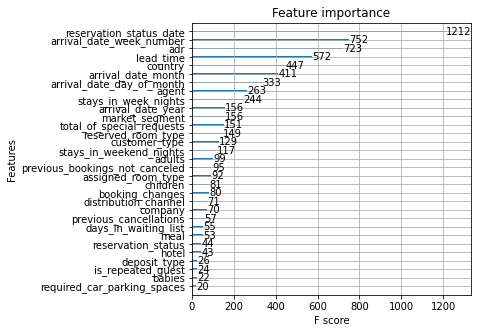

In [ ]:



xg_reg = xgb.train(params={"objective":"binary:logistic",'colsample_bytree': 0.5,'learning_rate': 0.1,'max_depth': 15, 'alpha': 10}, 
                   dtrain=dmatrix, num_boost_round=50)

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
print('\nMatrix')
print(confusion_matrix(y_test, labels))

print('\nClassification Report')
print(classification_report(y_test, labels))

print(f'\nAccuracy: {accuracy_score(y_test, labels)}')

print(f'\nAUC: {roc_auc_score(y_test, labels)}')
print(f'Recall score: {recall_score(y_test, labels)}')
print(f'Precision score: {recall_score(y_test, labels)}')
print(f'f1-score: {f1_score(y_test, labels)}')


Matrix
[[22498    80]
 [ 4310  8929]]

Classification Report
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     22578
           1       0.99      0.67      0.80     13239

    accuracy                           0.88     35817
   macro avg       0.92      0.84      0.86     35817
weighted avg       0.90      0.88      0.87     35817


Accuracy: 0.8774325041181562

AUC: 0.8354517191323673
Recall score: 0.6744467104766221
Precision score: 0.6744467104766221
f1-score: 0.8026788924847176


In [ ]:
# evaluate predictions
accuracy_2 = accuracy_score(y_test, labels)
print("Accuracy: %.2f%%" % (accuracy_2 * 100.0))

#preds = xg_reg.predict(X_test)
#preds
#_train

Accuracy: 87.74%


##Decision Trees

In [36]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

In [37]:
acc_dtc = accuracy_score(y_test, y_pred_dtc)
print("Decision Tree Accuracy: %.2f%%" % (acc_dtc * 100.0))

Decision Tree Accuracy: 100.00%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


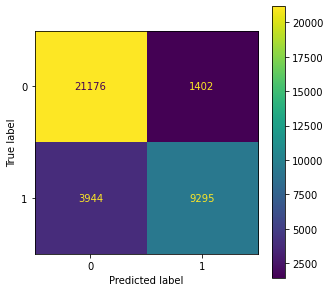

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc, X_test, y_test)

In [ ]:
clf_report = classification_report(y_test, y_pred_dtc)
print(clf_report)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     22578
           1       0.87      0.70      0.78     13239

    accuracy                           0.85     35817
   macro avg       0.86      0.82      0.83     35817
weighted avg       0.85      0.85      0.85     35817



##Comparison of Accuracy Scores

In [ ]:
i_acc_dtc = acc_dtc
i_acc_xgb = accuracy_2
i_acc_lrcv = LRCV_acc

table = pd.DataFrame({"Model": ["Decision Tree", "Logistic Regression CV", "XGBoost with K-folds CV"], "Accuracy Scores": [i_acc_dtc, i_acc_lrcv, i_acc_xgb]})
table["Model"] = table["Model"].astype("category")
table["Accuracy Scores"] = table["Accuracy Scores"].astype("float32")

pd.pivot_table(table, index = ["Model"]).sort_values(by = 'Accuracy Scores', ascending=False)

,Accuracy Scores
Model,
XGBoost with K-folds CV,0.877433
Decision Tree,0.850741
Logistic Regression CV,0.809336
